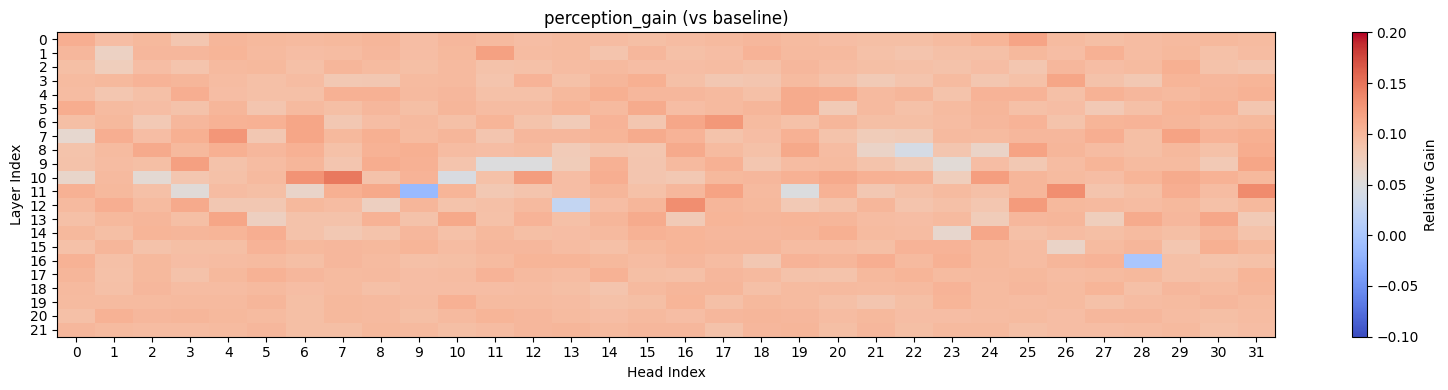

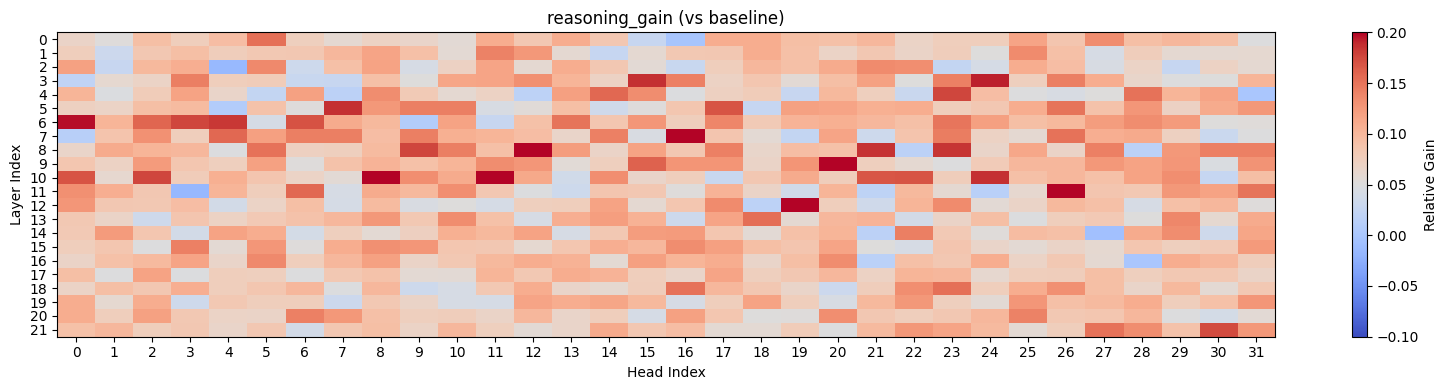

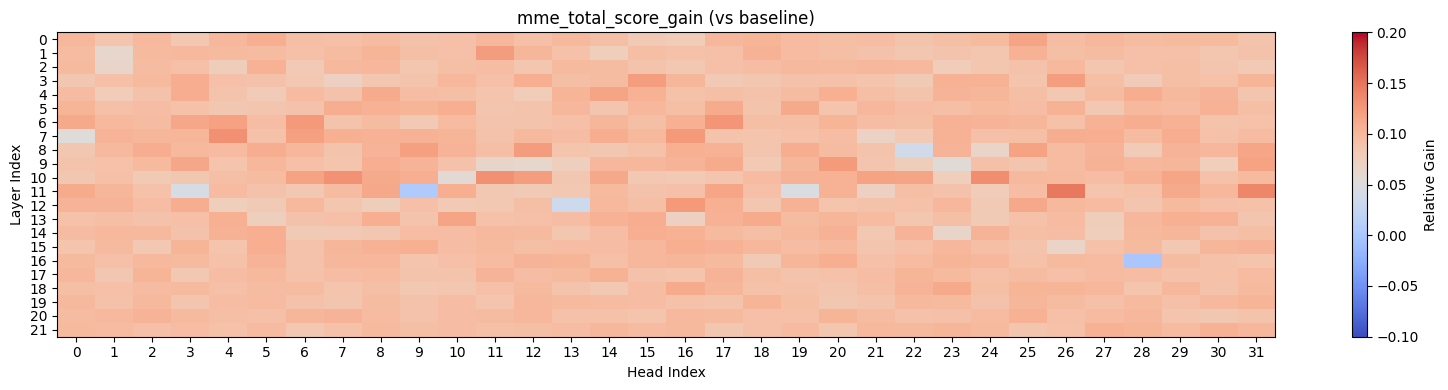

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ===== 配置 =====
CSV_PATH = "./Experimental_Data/llava_pastamm_mme_gain_vs_baseline_0-21.csv"
METRICS = ["perception_gain", "reasoning_gain", "mme_total_score_gain"]

VMIN = -0.1   # 下界
VMAX = 0.2    # 上界
CMAP = "coolwarm"  # 对称、适合正负变化

# ===== 读取数据 =====
df = pd.read_csv(CSV_PATH)

# 确保排序正确
df = df.sort_values(by=["layer", "head"])

num_layers = df["layer"].nunique()
num_heads = df["head"].nunique()

# ===== 为每个 metric 画一张热力图 =====
for metric in METRICS:
    # 构建 layer x head 的矩阵
    heatmap = np.zeros((num_layers, num_heads))

    for _, row in df.iterrows():
        heatmap[int(row["layer"]), int(row["head"])] = row[metric]

    # ===== 绘图 =====
    plt.figure(figsize=(16, 4))  # 横向拉伸，方便看 32 个 head
    im = plt.imshow(
        heatmap,
        aspect="auto",
        cmap=CMAP,
        vmin=VMIN,
        vmax=VMAX
    )

    # 轴标签
    plt.xlabel("Head Index")
    plt.ylabel("Layer Index")
    plt.title(f"{metric} (vs baseline)")

    # 刻度
    plt.xticks(range(num_heads))
    plt.yticks(range(num_layers))

    # colorbar
    cbar = plt.colorbar(im)
    cbar.set_label("Relative Gain")

    plt.tight_layout()
    plt.show()

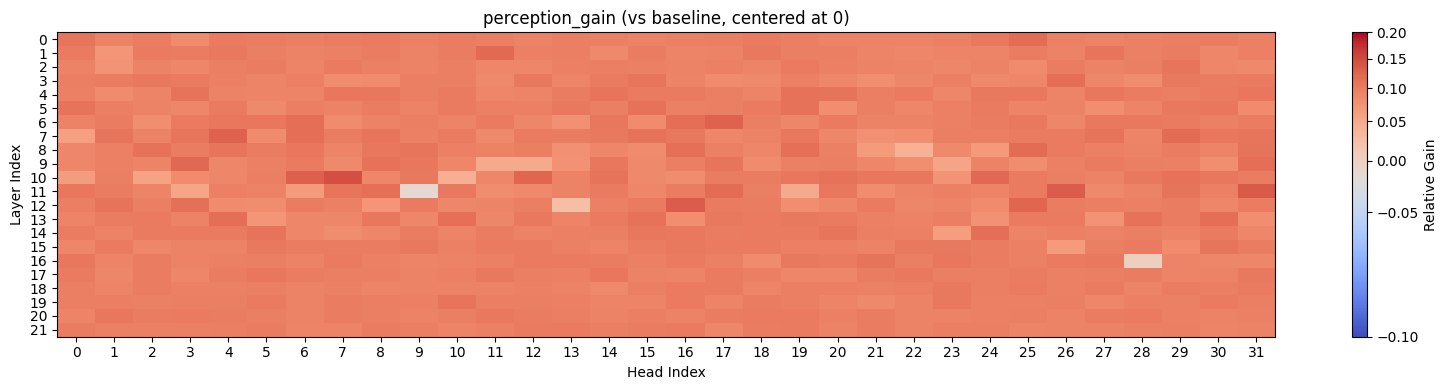

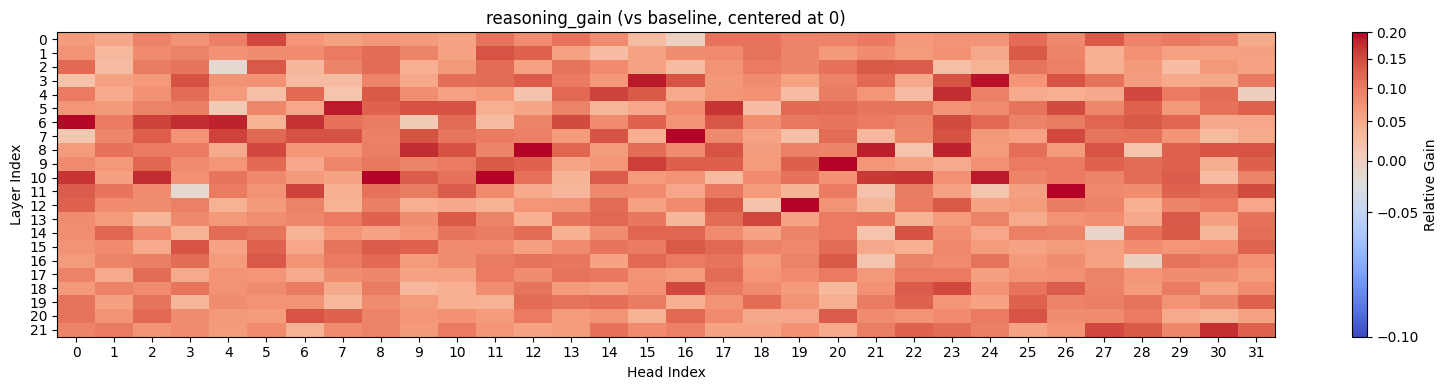

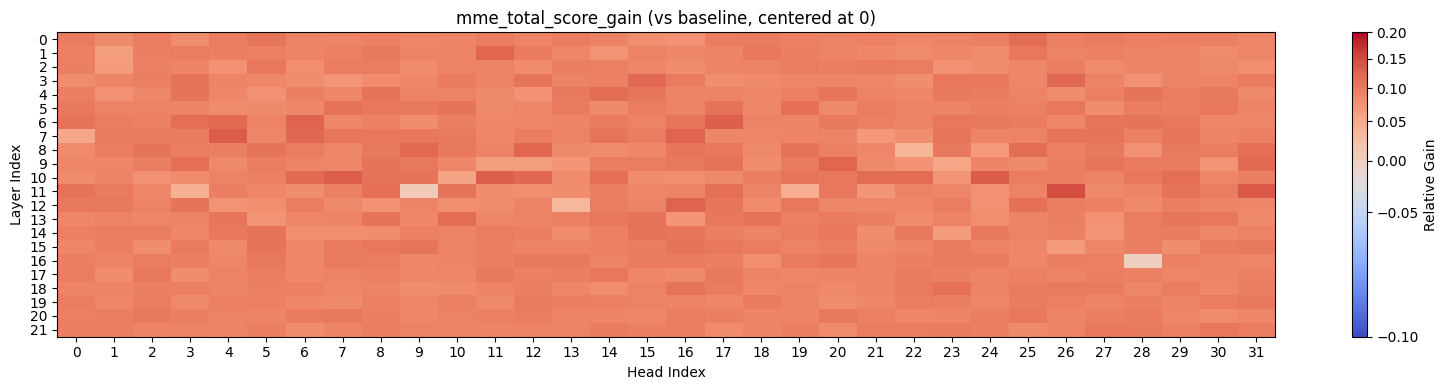

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import PowerNorm

CSV_PATH = "./Experimental_Data/llava_pastamm_mme_gain_vs_baseline_0-21.csv"
METRICS = ["perception_gain", "reasoning_gain", "mme_total_score_gain"]

df = pd.read_csv(CSV_PATH)
df = df.sort_values(by=["layer", "head"])

num_layers = df["layer"].nunique()
num_heads = df["head"].nunique()

for metric in METRICS:
    heatmap = np.zeros((num_layers, num_heads))
    for _, row in df.iterrows():
        heatmap[int(row["layer"]), int(row["head"])] = row[metric]

    # === 关键：以 0 为中心的非线性归一化 ===
    norm = PowerNorm(
        gamma=0.5,   # <1 放大小值差异
        vmin=-0.1,
        vmax=0.2
    )

    plt.figure(figsize=(16, 4))
    im = plt.imshow(
        heatmap,
        aspect="auto",
        cmap="coolwarm",
        norm=norm
    )

    plt.xlabel("Head Index")
    plt.ylabel("Layer Index")
    plt.title(f"{metric} (vs baseline, centered at 0)")

    plt.xticks(range(num_heads))
    plt.yticks(range(num_layers))

    cbar = plt.colorbar(im)
    cbar.set_label("Relative Gain")

    plt.tight_layout()
    plt.show()